In [12]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


In [13]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('netflix_titles.csv', encoding='latin-1')
except UnicodeDecodeError:
    df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

In [14]:
print(df.shape)
print(list(df.columns))

(8809, 26)
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


In [15]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [16]:
before_dup = df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)
print(f"Duplicates removed: {before_dup - df.duplicated().sum()}")

Duplicates removed: 0


In [17]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'unnamed:_12', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15',
       'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19',
       'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23',
       'unnamed:_24', 'unnamed:_25'],
      dtype='object')


In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')
print("Date parsing done")

Date parsing done


In [19]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

for col in df.select_dtypes(include=['Int64', 'float64']).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Handle date_added nulls created by coerce
df.dropna(subset=['date_added'], inplace=True)

print("Missing values handled")

Missing values handled


In [20]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0].strip())
df['description'] = df['description'].str.lower()
df['year_added'] = df['date_added'].dt.year
print("Feature extraction done")

Feature extraction done


In [21]:
df.info()
cleaned_file_name = 'netflix_titles_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)
print(f"Cleaned dataset exported as: {cleaned_file_name}")

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, 0 to 8808
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8711 non-null   object        
 1   type          8711 non-null   object        
 2   title         8711 non-null   object        
 3   director      8711 non-null   object        
 4   cast          8711 non-null   object        
 5   country       8711 non-null   object        
 6   date_added    8711 non-null   datetime64[ns]
 7   release_year  8711 non-null   Int64         
 8   rating        8711 non-null   object        
 9   duration      8711 non-null   object        
 10  listed_in     8711 non-null   object        
 11  description   8711 non-null   object        
 12  unnamed:_12   0 non-null      float64       
 13  unnamed:_13   0 non-null      float64       
 14  unnamed:_14   0 non-null      float64       
 15  unnamed:_15   0 non-null      float64      

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

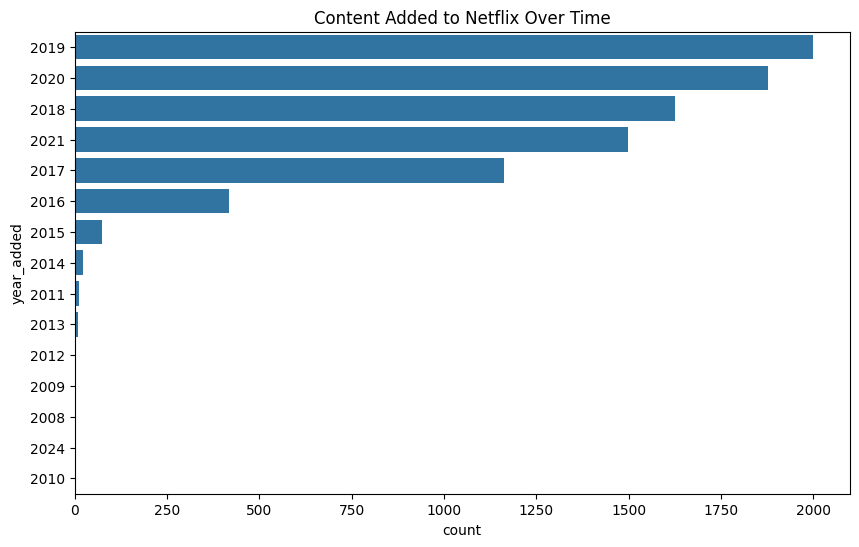

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='year_added', data=df, order=df['year_added'].value_counts().index)
plt.title('Content Added to Netflix Over Time')
plt.show()

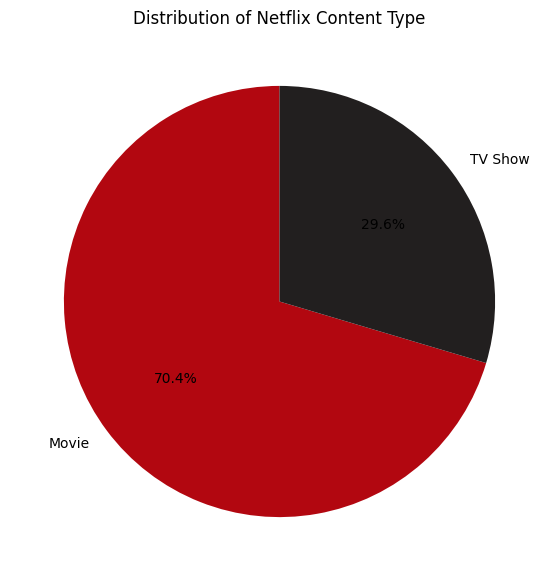

In [24]:
plt.figure(figsize=(7, 7))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#b20710', '#221f1f'])
plt.title('Distribution of Netflix Content Type')
plt.ylabel('')
plt.show()

In [25]:
df.info()
cleaned_file_name = 'netflix_titles_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)
print(f"Cleaned dataset exported as: {cleaned_file_name}")

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, 0 to 8808
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8711 non-null   object        
 1   type          8711 non-null   object        
 2   title         8711 non-null   object        
 3   director      8711 non-null   object        
 4   cast          8711 non-null   object        
 5   country       8711 non-null   object        
 6   date_added    8711 non-null   datetime64[ns]
 7   release_year  8711 non-null   Int64         
 8   rating        8711 non-null   object        
 9   duration      8711 non-null   object        
 10  listed_in     8711 non-null   object        
 11  description   8711 non-null   object        
 12  unnamed:_12   0 non-null      float64       
 13  unnamed:_13   0 non-null      float64       
 14  unnamed:_14   0 non-null      float64       
 15  unnamed:_15   0 non-null      float64      